Explore different AEs

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [11]:
import numpy as np
import pandas as pd
import time
from pymongo import MongoClient
import matplotlib.pyplot as plt
%matplotlib inline

from keras.layers import Input, Dense, Conv1D, MaxPooling1D, UpSampling1D
from keras.models import Model
import keras
import keras.backend as K

In [2]:
client = MongoClient()

### Load data

In [3]:
samples = []
# labels = []
# for collection in ['skin','ovary','breast']:
#     db = client['Rebased'][collection]
db = client['Rebased']['breast']
for sam in db.find({ 'cytobands': { '$exists': True, '$ne': None } }):
    features = []
    for band in sam['cytobands']:
        if band['chro'] not in ['X','Y']:
            features.extend([band['ave_dup'],band['ave_del']])
    samples.append(features)
#     labels.append('{}_{}'.format(collection,sam['source']))

In [4]:
feat_mat = np.array(samples)

In [5]:
feat_mat.shape[1]

1622

### Pickle data

In [30]:
import pickle

In [33]:
with open('/Users/bogao/DataFiles/new landscape/data/breast_bands.pkl', 'wb') as fo:
    pickle.dump(feat_mat, fo)

### Scale data

In [6]:
from sklearn import preprocessing
import seaborn as sns

In [7]:
feat_scaled = preprocessing.MinMaxScaler().fit_transform(np.abs(feat_mat))
# feat_scaled = preprocessing.MinMaxScaler().fit_transform(feat_mat)
# feat_scaled = preprocessing.MinMaxScaler().fit_transform(np.abs(feat_mat))[:1,:]

### Init param

In [8]:
early_stopping_monitor = keras.callbacks.EarlyStopping(monitor='loss', patience=10,mode='min')

In [9]:
input_size = feat_scaled.shape[1]
hidden_size = 800
output_size = input_size
epochs = 2000
batch_size = 128

### Multi-layers AE

In [286]:
x = Input(shape=(input_size,))
hidden_1 = Dense(1024, activation='relu')(x)
hidden_2 = Dense(512, activation='relu')(hidden_1)
hidden_3 = Dense(256, activation='relu')(hidden_2)
hidden_4 = Dense(128, activation='relu')(hidden_3)
hidden_5 = Dense(64, activation='relu')(hidden_4)
h = Dense(32, activation='relu', activity_regularizer=keras.regularizers.l1(10e-5))(hidden_5)
hidden_6 = Dense(64, activation='relu')(h)
hidden_7 = Dense(128, activation='relu')(hidden_6)
hidden_8 = Dense(256, activation='relu')(hidden_7)
hidden_9 = Dense(512, activation='relu')(hidden_8)
hidden_10 = Dense(1024, activation='relu')(hidden_9)
r = Dense(input_size, activation='sigmoid')(hidden_10)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adam', loss='mse')


# history = autoencoder.fit(feat_mat, feat_mat, batch_size=batch_size, epochs=epochs, verbose=1)
history = autoencoder.fit(feat_scaled, feat_scaled, batch_size=batch_size, epochs=epochs, callbacks = [early_stopping_monitor])
# history = autoencoder.fit(x_train, x_train, batch_size=batch_size, epochs=epochs, verbose=1, 
#                           validation_data=(x_test, x_test))

Epoch 1/50
6250/6250 [==============================] - 9s 1ms/step - loss: 0.0065
Epoch 2/50
6250/6250 [==============================] - 3s 558us/step - loss: 0.0060
Epoch 3/50
6250/6250 [==============================] - 4s 574us/step - loss: 0.0060
Epoch 4/50
6250/6250 [==============================] - 4s 565us/step - loss: 0.0060
Epoch 5/50
6250/6250 [==============================] - 4s 571us/step - loss: 0.0060
Epoch 6/50
6250/6250 [==============================] - 4s 563us/step - loss: 0.0060
Epoch 7/50
6250/6250 [==============================] - 3s 550us/step - loss: 0.0060
Epoch 8/50
6250/6250 [==============================] - 3s 543us/step - loss: 0.0060
Epoch 9/50
6250/6250 [==============================] - 3s 533us/step - loss: 0.0060
Epoch 10/50
6250/6250 [==============================] - 3s 536us/step - loss: 0.0060
Epoch 11/50
6250/6250 [==============================] - 4s 579us/step - loss: 0.0060
Epoch 12/50
6250/6250 [==============================] - 4s 605us

### Vanilla AE

In [303]:

x = Input(shape=(input_size,))

# Encoder
h = Dense(hidden_size, activation='relu')(x)

# Decoder
r = Dense(output_size, activation='linear')(h)

autoencoder_va = Model(inputs=x, outputs=r)
autoencoder_va.compile(optimizer='adam', loss='mse',metrics=['accuracy'])


# history = autoencoder_va.fit(feat_mat, feat_mat, batch_size=batch_size, epochs=epochs, verbose=1)
history = autoencoder_va.fit(feat_scaled, feat_scaled, batch_size=batch_size, epochs=epochs, callbacks = [early_stopping_monitor],shuffle=True)
# history = autoencoder_va.fit(x_train, x_train, batch_size=batch_size, epochs=epochs, verbose=1, 
#                           validation_data=(x_test, x_test))

Epoch 1/2000
6250/6250 [==============================] - 7s 1ms/step - loss: 0.0051 - acc: 0.0016
Epoch 2/2000
6250/6250 [==============================] - 2s 338us/step - loss: 0.0035 - acc: 0.0288
Epoch 3/2000
6250/6250 [==============================] - 2s 325us/step - loss: 0.0026 - acc: 0.0552
Epoch 4/2000
6250/6250 [==============================] - 2s 320us/step - loss: 0.0021 - acc: 0.0819
Epoch 5/2000
6250/6250 [==============================] - 2s 326us/step - loss: 0.0019 - acc: 0.1064
Epoch 6/2000
6250/6250 [==============================] - 2s 331us/step - loss: 0.0017 - acc: 0.1272
Epoch 7/2000
6250/6250 [==============================] - 2s 335us/step - loss: 0.0015 - acc: 0.1453
Epoch 8/2000
6250/6250 [==============================] - 2s 324us/step - loss: 0.0014 - acc: 0.1568
Epoch 9/2000
6250/6250 [==============================] - 2s 316us/step - loss: 0.0013 - acc: 0.1747
Epoch 10/2000
6250/6250 [==============================] - 2s 319us/step - loss: 0.0012 - acc

Epoch 79/2000
6250/6250 [==============================] - 2s 309us/step - loss: 4.7019e-04 - acc: 0.4525
Epoch 80/2000
6250/6250 [==============================] - 2s 305us/step - loss: 4.8461e-04 - acc: 0.4534
Epoch 81/2000
6250/6250 [==============================] - 2s 307us/step - loss: 4.7611e-04 - acc: 0.4563
Epoch 82/2000
6250/6250 [==============================] - 2s 296us/step - loss: 4.6903e-04 - acc: 0.4566
Epoch 83/2000
6250/6250 [==============================] - 2s 295us/step - loss: 4.6485e-04 - acc: 0.4579
Epoch 84/2000
6250/6250 [==============================] - 2s 293us/step - loss: 4.5631e-04 - acc: 0.4634
Epoch 85/2000
6250/6250 [==============================] - 2s 294us/step - loss: 4.4881e-04 - acc: 0.4646
Epoch 86/2000
6250/6250 [==============================] - 2s 291us/step - loss: 4.5038e-04 - acc: 0.4630
Epoch 87/2000
6250/6250 [==============================] - 2s 294us/step - loss: 4.4471e-04 - acc: 0.4645
Epoch 88/2000
6250/6250 [=====================

6250/6250 [==============================] - 2s 315us/step - loss: 2.9596e-04 - acc: 0.5661
Epoch 232/2000
6250/6250 [==============================] - 2s 317us/step - loss: 2.8686e-04 - acc: 0.5688
Epoch 233/2000
6250/6250 [==============================] - 2s 332us/step - loss: 2.9225e-04 - acc: 0.5661
Epoch 234/2000
6250/6250 [==============================] - 2s 306us/step - loss: 2.8820e-04 - acc: 0.5643
Epoch 235/2000
6250/6250 [==============================] - 2s 296us/step - loss: 2.8576e-04 - acc: 0.5638
Epoch 236/2000
6250/6250 [==============================] - 2s 299us/step - loss: 2.8855e-04 - acc: 0.5662
Epoch 237/2000
6250/6250 [==============================] - 2s 306us/step - loss: 2.8916e-04 - acc: 0.5710
Epoch 238/2000
6250/6250 [==============================] - 2s 296us/step - loss: 2.8863e-04 - acc: 0.5656
Epoch 239/2000
6250/6250 [==============================] - 2s 295us/step - loss: 2.8548e-04 - acc: 0.5642
Epoch 240/2000
6250/6250 [==========================

### Denoising AE

In [308]:
noise_factor = 0.05
feat_noisy = feat_scaled + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=feat_scaled.shape) 
feat_noisy = np.clip(feat_noisy, 0., 1.)

In [309]:
x = Input(shape=(input_size,))
h = Dense(hidden_size, activation='relu')(x)
r = Dense(output_size, activation='sigmoid')(h)

autoencoder_dn = Model(inputs=x, outputs=r)
autoencoder_dn.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

history = autoencoder_dn.fit(feat_noisy, feat_noisy, batch_size=batch_size,epochs=epochs, callbacks = [early_stopping_monitor],shuffle=True)

Epoch 1/2000
6250/6250 [==============================] - 7s 1ms/step - loss: 0.0337 - acc: 0.0011
Epoch 2/2000
6250/6250 [==============================] - 2s 321us/step - loss: 0.0091 - acc: 0.0016
Epoch 3/2000
6250/6250 [==============================] - 2s 320us/step - loss: 0.0091 - acc: 0.0014
Epoch 4/2000
6250/6250 [==============================] - 2s 318us/step - loss: 0.0090 - acc: 0.0026
Epoch 5/2000
6250/6250 [==============================] - 2s 317us/step - loss: 0.0090 - acc: 0.0018
Epoch 6/2000
6250/6250 [==============================] - 2s 314us/step - loss: 0.0090 - acc: 0.0022
Epoch 7/2000
6250/6250 [==============================] - 2s 299us/step - loss: 0.0089 - acc: 0.0024
Epoch 8/2000
6250/6250 [==============================] - 2s 301us/step - loss: 0.0087 - acc: 0.0032
Epoch 9/2000
6250/6250 [==============================] - 2s 300us/step - loss: 0.0086 - acc: 0.0018
Epoch 10/2000
6250/6250 [==============================] - 2s 300us/step - loss: 0.0085 - acc

6250/6250 [==============================] - 2s 297us/step - loss: 9.4872e-04 - acc: 0.6614
Epoch 161/2000
6250/6250 [==============================] - 2s 296us/step - loss: 9.4547e-04 - acc: 0.6630
Epoch 162/2000
6250/6250 [==============================] - 2s 299us/step - loss: 9.4633e-04 - acc: 0.6608
Epoch 163/2000
6250/6250 [==============================] - 2s 311us/step - loss: 9.4618e-04 - acc: 0.6579
Epoch 164/2000
6250/6250 [==============================] - 2s 314us/step - loss: 9.4175e-04 - acc: 0.6654
Epoch 165/2000
6250/6250 [==============================] - 2s 312us/step - loss: 9.4492e-04 - acc: 0.6664
Epoch 166/2000
6250/6250 [==============================] - 2s 314us/step - loss: 9.5738e-04 - acc: 0.6595
Epoch 167/2000
6250/6250 [==============================] - 2s 317us/step - loss: 9.5809e-04 - acc: 0.6603
Epoch 168/2000
6250/6250 [==============================] - 2s 314us/step - loss: 9.4794e-04 - acc: 0.6659
Epoch 169/2000
6250/6250 [==========================

6250/6250 [==============================] - 2s 310us/step - loss: 6.8268e-04 - acc: 0.7619


In [13]:
feat_scaled.shape(6250,1622,1)

(6250, 1622)

### Convolutional AE

In [21]:
x = Input(shape=(1622,1))
# Encoder
enconv = Conv1D(4, 3, activation='relu', padding='same')(x)
h = MaxPooling1D(2)(enconv)
deconv = Conv1D(4, 3, activation='relu', padding='same')(h)
deconv_up = UpSampling1D(2)(deconv)
r = Conv1D(1, 3, activation='sigmoid', padding='same')(deconv_up)

autoencoder_cv = Model(inputs=x, outputs=r)
autoencoder_cv.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

In [22]:
feat_cv = feat_scaled.reshape(6250,1622,1)

In [ ]:
history = autoencoder_cv.fit(feat_cv, feat_cv, batch_size=batch_size,epochs=epochs, callbacks = [early_stopping_monitor],shuffle=True)

Epoch 1/2000


### Contractive AE

In [28]:
lam=1e-5

x = Input(shape=(input_size,))
h = Dense(hidden_size, activation='relu', name='encoded')(x)
r = Dense(output_size, activation='sigmoid')(h)

autoencoder_ct = Model(inputs=x, outputs=r)

def contractive_loss(y_pred, y_true):
    mse = K.mean(K.square(y_true - y_pred), axis=1)

    W = K.variable(value=autoencoder_ct.get_layer('encoded').get_weights()[0])  # N x N_hidden
    W = K.transpose(W)  # N_hidden x N
    h = autoencoder_ct.get_layer('encoded').output
    dh = h * (1 - h)  # N_batch x N_hidden

    # N_batch x N_hidden * N_hidden x 1 = N_batch x 1
    contractive = lam * K.sum(dh**2 * K.sum(W**2, axis=1), axis=1)

    return mse + contractive


autoencoder_ct.compile(optimizer='adam', loss=contractive_loss, metrics=['accuracy'])
history = autoencoder_ct.fit(feat_scaled, feat_scaled, batch_size=batch_size,epochs=epochs, callbacks = [early_stopping_monitor],shuffle=True)

Epoch 1/2000
6250/6250 [==============================] - 3s 510us/step - loss: 0.0509 - acc: 6.4000e-04
Epoch 2/2000
6250/6250 [==============================] - 2s 336us/step - loss: 0.0107 - acc: 3.2000e-04
Epoch 3/2000
6250/6250 [==============================] - 2s 335us/step - loss: 0.0088 - acc: 4.8000e-04
Epoch 4/2000
6250/6250 [==============================] - 2s 340us/step - loss: 0.0083 - acc: 3.2000e-04
Epoch 5/2000
6250/6250 [==============================] - 2s 346us/step - loss: 0.0081 - acc: 3.2000e-04
Epoch 6/2000
6250/6250 [==============================] - 2s 355us/step - loss: 0.0080 - acc: 3.2000e-04
Epoch 7/2000
6250/6250 [==============================] - 2s 359us/step - loss: 0.0080 - acc: 3.2000e-04
Epoch 8/2000
6250/6250 [==============================] - 2s 364us/step - loss: 0.0079 - acc: 3.2000e-04
Epoch 9/2000
6250/6250 [==============================] - 2s 358us/step - loss: 0.0079 - acc: 3.2000e-04
Epoch 10/2000
6250/6250 [==============================

6250/6250 [==============================] - 3s 420us/step - loss: 5.3491e-04 - acc: 0.5400
Epoch 157/2000
6250/6250 [==============================] - 3s 400us/step - loss: 5.3414e-04 - acc: 0.5422
Epoch 158/2000
6250/6250 [==============================] - 2s 392us/step - loss: 5.3339e-04 - acc: 0.5394
Epoch 159/2000
6250/6250 [==============================] - 2s 370us/step - loss: 5.3093e-04 - acc: 0.5416
Epoch 160/2000
6250/6250 [==============================] - 2s 396us/step - loss: 5.2901e-04 - acc: 0.5445
Epoch 161/2000
6250/6250 [==============================] - 3s 401us/step - loss: 5.2816e-04 - acc: 0.5438
Epoch 162/2000
6250/6250 [==============================] - 3s 403us/step - loss: 5.2475e-04 - acc: 0.5469 
Epoch 163/2000
6250/6250 [==============================] - 3s 424us/step - loss: 5.2253e-04 - acc: 0.5496
Epoch 164/2000
6250/6250 [==============================] - 3s 427us/step - loss: 5.1752e-04 - acc: 0.5515
Epoch 165/2000
6250/6250 [=========================

6250/6250 [==============================] - 2s 366us/step - loss: 3.5414e-04 - acc: 0.6578
Epoch 309/2000
6250/6250 [==============================] - 2s 367us/step - loss: 3.5480e-04 - acc: 0.6523
Epoch 310/2000
6250/6250 [==============================] - 2s 398us/step - loss: 3.5320e-04 - acc: 0.6549
Epoch 311/2000
6250/6250 [==============================] - 2s 395us/step - loss: 3.5168e-04 - acc: 0.6544
Epoch 312/2000
6250/6250 [==============================] - 2s 397us/step - loss: 3.5218e-04 - acc: 0.6550
Epoch 313/2000
6250/6250 [==============================] - 2s 368us/step - loss: 3.5140e-04 - acc: 0.6546
Epoch 314/2000
6250/6250 [==============================] - 2s 352us/step - loss: 3.4889e-04 - acc: 0.6578
Epoch 315/2000
6250/6250 [==============================] - 2s 336us/step - loss: 3.5047e-04 - acc: 0.6526
Epoch 316/2000
6250/6250 [==============================] - 2s 342us/step - loss: 3.5127e-04 - acc: 0.6590
Epoch 317/2000
6250/6250 [==========================

### Plots

In [17]:
idx = 0

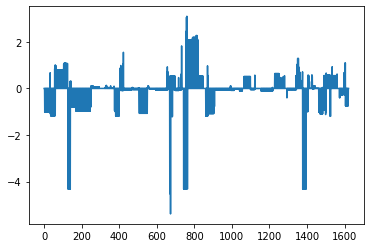

In [176]:
sns.lineplot(x=range(input_size),y=feat_mat[idx])

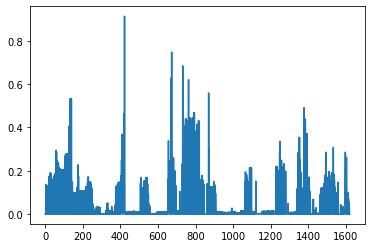

In [227]:
sns.lineplot(x=range(input_size),y=feat_scaled[idx])

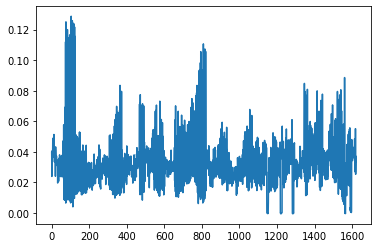

In [288]:
decoded = autoencoder.predict(feat_scaled)
sns.lineplot(x=range(input_size),y=decoded[idx])

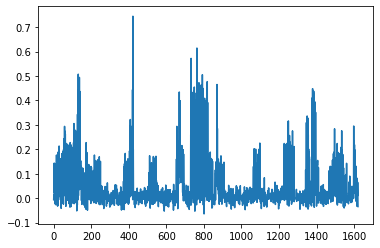

In [304]:
decoded_va = autoencoder_va.predict(feat_scaled)
sns.lineplot(x=range(input_size),y=decoded_va[idx])

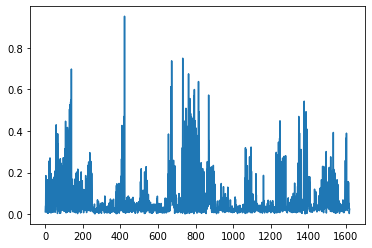

In [312]:
decoded_dn = autoencoder_dn.predict(feat_noisy)
sns.lineplot(x=range(input_size),y=decoded_dn[idx])

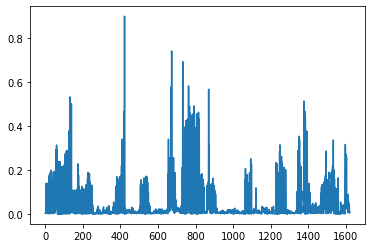

In [29]:
decoded_ct = autoencoder_ct.predict(feat_scaled)
sns.lineplot(x=range(input_size),y=decoded_ct[idx])

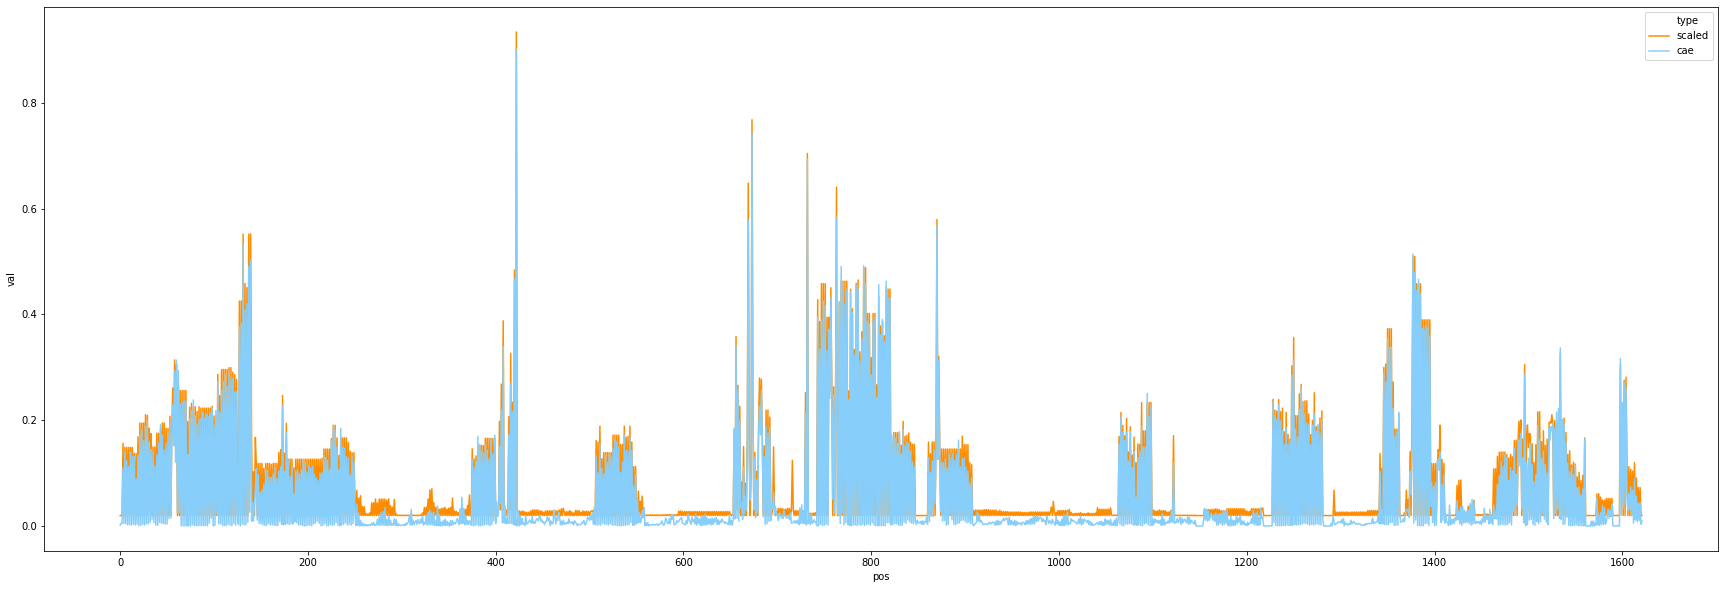

In [54]:
plt.figure(figsize=(30,10))
data_scaled = pd.DataFrame({'val':feat_scaled[idx]+0.02, 'pos':range(input_size), 'type':'scaled'})
data_ct = pd.DataFrame({'val':decoded_ct[idx], 'pos':range(input_size), 'type':'cae'})
data = data_scaled.append(data_ct, ignore_index=True)

sns.lineplot(x='pos',y='val', hue='type', data=data, palette=sns.color_palette(['darkorange','lightskyblue']))

In [247]:
feat_scaled.shape

(6250, 1622)

Text(0.5, 0, 'Vanilla-AE')

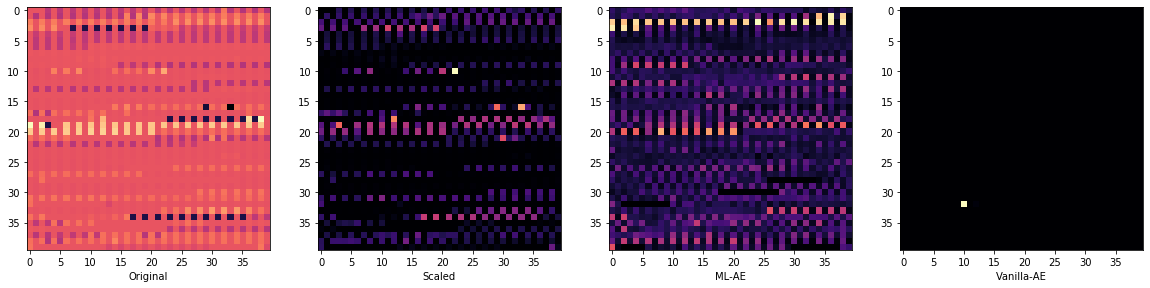

In [238]:

plt.figure(figsize=(20,10))

plt.subplot(1,4, 1)
plt.imshow(feat_mat[idx][:1600,].reshape(40,40), cmap='magma')
plt.xlabel("Original")

plt.subplot(1,4, 2)
plt.imshow(feat_scaled[idx][:1600,].reshape(40,40), cmap='magma')
plt.xlabel("Scaled")

plt.subplot(1,4, 3)
plt.imshow(decoded[idx][:1600,].reshape(40,40), cmap='magma')
plt.xlabel("ML-AE")

plt.subplot(1,4, 4)
plt.imshow(decoded_va[idx][:1600,].reshape(40,40), cmap='magma')
plt.xlabel("Vanilla-AE")



In [151]:
from sklearn.model_selection import train_test_split

In [153]:
x_train,x_test = train_test_split(feat_scaled, test_size=0.3)

In [154]:
x_train.shape

(4375, 1622)

In [155]:
x_test.shape

(1875, 1622)